# Analysis of IMDB Data

We will analyze a subset of IMDB's actors, genres, movie actors, and movie ratings data. This dataset comes to us from Kaggle (https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset) although we have taken steps to pull this data into a publis s3 bucket: 

* s3://cis9760-lecture9-movieanalysis/name.basics.tsv ---> (actors)
* s3://cis9760-lecture9-movieanalysis/title.basics.tsv ---> (genres)
* s3://cis9760-lecture9-movieanalysis/title.principals.tsv ---> (movie actors)
* s3://cis9760-lecture9-movieanalysis/title.ratings.tsv ---> (movie ratings)

# Content

**<br />name.basics.tsv.gz – Contains the following information for names:**
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />primaryName (string)– name by which the person is most often credited.
<br />birthYear – in YYYY format.
<br />deathYear – in YYYY format if applicable, else .
<br />primaryProfession (array of strings)– the top-3 professions of the person.
<br />knownForTitles (array of tconsts) – titles the person is known for.
<br/><br/>
**<br />title.basics.tsv.gz - Contains the following information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
<br />primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release.
<br />originalTitle (string) - original title, in the original language.
<br />isAdult (boolean) - 0: non-adult title; 1: adult title.
<br />startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
<br />endYear (YYYY) – TV Series end year. for all other title types.
<br />runtimeMinutes – primary runtime of the title, in minutes.
<br />genres (string array) – includes up to three genres associated with the title.
<br/><br/>
**<br />title.principals.tsv – Contains the principal cast/crew for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />ordering (integer) – a number to uniquely identify rows for a given titleId.
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />category (string) - the category of job that person was in.
<br />job (string) - the specific job title if applicable, else.
<br />characters (string) - the name of the character played if applicable, else.
<br/><br/>
**<br />title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />averageRating – weighted average of all the individual user ratings.
<br />numVotes - number of votes the title has received.

# PART 1 - Installation and Initial Setup


Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

In [1]:
%%info

Let's install the necessary packages here

In [2]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
15,application_1701373284599_0016,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- ------------
aws-cfn-bootstrap          2.0
beautifulsoup4             4.9.3
boto                       2.49.0
click                      8.1.7
docutils                   0.14
jmespath                   1.0.1
joblib                     1.3.2
lockfile                   0.11.0
lxml                       4.9.3
mysqlclient                1.4.2
nltk                       3.8.1
nose                       1.3.4
numpy                      1.20.0
pip                        20.2.2
py-dateutil                2.2
pystache                   0.5.4
python-daemon              2.2.3
python37-sagemaker-pyspark 1.4.2
pytz                       2023.3.post1
PyYAML                     5.4.1
regex                      2021.11.10
setuptools                 28.8.0
simplejson                 3.2.0
six                        1.13.0
tqdm                       4.66.1
wheel                      0.29.0
windmill                   1.6


Now, import the installed packages from the previous block below.

In [3]:
sc.install_pypi_package("pandas==1.0.5")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now, import the installed packages from the previous block below.

In [4]:
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

Load all data from S3 into a Spark dataframe object 

In [6]:
actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.tsv',sep=r'\t',header=True)
genres = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basics.tsv',sep=r'\t',header=True)
movie_actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.principals.tsv',sep=r'\t',header=True)
ratings = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.ratings.tsv',sep=r'\t',header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Actors

Display the schema below:

In [7]:
actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

Display the first 5 rows with the following columns:

* `primaryName`
* `birthYear`
* `deathYear`
* `knownForTitles`

In [9]:
actors.select("primaryName", "birthYear", "deathYear", "knownForTitles").show(5, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+---------------------------------------+
|primaryName    |birthYear|deathYear|knownForTitles                         |
+---------------+---------+---------+---------------------------------------+
|Fred Astaire   |1899     |1987     |tt0050419,tt0053137,tt0072308,tt0043044|
|Lauren Bacall  |1924     |2014     |tt0071877,tt0117057,tt0038355,tt0037382|
|Brigitte Bardot|1934     |\N       |tt0054452,tt0049189,tt0059956,tt0057345|
|John Belushi   |1949     |1982     |tt0077975,tt0072562,tt0080455,tt0078723|
|Ingmar Bergman |1918     |2007     |tt0069467,tt0050976,tt0083922,tt0050986|
+---------------+---------+---------+---------------------------------------+
only showing top 5 rows

## Genres

Display the first 10 rows with the following columns:
    
* `titleType`
* `primaryTitle`
* `genres`

In [10]:
genres.select("titleType", "primaryTitle", "genres").show(10, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------------------------------------+------------------------+
|titleType|primaryTitle                               |genres                  |
+---------+-------------------------------------------+------------------------+
|short    |Carmencita                                 |Documentary,Short       |
|short    |Le clown et ses chiens                     |Animation,Short         |
|short    |Pauvre Pierrot                             |Animation,Comedy,Romance|
|short    |Un bon bock                                |Animation,Short         |
|short    |Blacksmith Scene                           |Comedy,Short            |
|short    |Chinese Opium Den                          |Short                   |
|short    |Corbett and Courtney Before the Kinetograph|Short,Sport             |
|short    |Edison Kinetoscopic Record of a Sneeze     |Documentary,Short       |
|movie    |Miss Jerry                                 |Romance                 |
|short    |Exiting the Facto

Display the unique categories below:

In [11]:
genres.select("titleType").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

Display the schema below:

In [12]:
genres.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

## Movie Actors


Display the schema below:

In [13]:
movie_actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

Display the first 10 rows below

In [14]:
movie_actors.show(10, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+---------------+-----------------------+-----------+
|tconst   |ordering|nconst   |category       |job                    |characters |
+---------+--------+---------+---------------+-----------------------+-----------+
|tt0000001|1       |nm1588970|self           |\N                     |["Herself"]|
|tt0000001|2       |nm0005690|director       |\N                     |\N         |
|tt0000001|3       |nm0374658|cinematographer|director of photography|\N         |
|tt0000002|1       |nm0721526|director       |\N                     |\N         |
|tt0000002|2       |nm1335271|composer       |\N                     |\N         |
|tt0000003|1       |nm0721526|director       |\N                     |\N         |
|tt0000003|2       |nm5442194|producer       |producer               |\N         |
|tt0000003|3       |nm1335271|composer       |\N                     |\N         |
|tt0000003|4       |nm5442200|editor         |\N                     |\N         |
|tt0

## Movie Ratings

Display the schema below:

In [18]:
ratings.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

Display the first 10 rows in a descending order by the number of votes

In [17]:
from pyspark.sql.functions import col

ratings.select("tconst", "AverageRating", "numVotes").sort(col("numVotes").desc()).show(10, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|tconst   |AverageRating|numVotes|
+---------+-------------+--------+
|tt7430722|6.8          |9999    |
|tt4445154|8.1          |9997    |
|tt2229907|6.3          |9996    |
|tt0294097|8.0          |9994    |
|tt0264734|6.5          |9993    |
|tt8860450|6.3          |9991    |
|tt2032572|5.2          |9991    |
|tt0025173|6.6          |999     |
|tt0696544|8.2          |999     |
|tt0062155|6.9          |999     |
+---------+-------------+--------+
only showing top 10 rows

# Overview of Data


Display the number of rows and columns in each dataFrame object.

In [19]:
num_columns = len(actors.columns)
print("Number of columns in Actors table:", num_columns)
num_rows = actors.count()
print("Number of rows in Actors table:", num_rows)
num_columns = len(genres.columns)
print("Number of columns in Genres table:", num_columns)
num_rows = genres.count()
print("Number of rows in Genres table:", num_rows)
num_columns = len(movie_actors.columns)
print("Number of columns in Movie Actors table:", num_columns)
num_rows = movie_actors.count()
print("Number of rows in Movie Actors table:", num_rows)
num_columns = len(ratings.columns)
print("Number of columns in Movie Ratings table:", num_columns)
num_rows = ratings.count()
print("Number of rows in Movie Ratings table:", num_rows)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Actors table: 6
Number of rows in Actors table: 9706922
Number of columns in Genres table: 9
Number of rows in Genres table: 6321302
Number of columns in Movie Actors table: 6
Number of rows in Movie Actors table: 36468817
Number of columns in Movie Ratings table: 3
Number of rows in Movie Ratings table: 993153

# PART 2 - Analyzing Genres

Let's now answer this question: how many unique genres are represented in this dataset?

Essentially, we have the genres per movie as a list - this is useful to quickly see what each movie might be represented as but it is difficult to easily answer questions such as:

* How many movies are categorized as Comedy, for instance?
* What are the top 20 most popular genres available?

## Association Table

We need to "break out" these genres from the tconst? One common approach to take is to build an association table mapping a single tconst multiple times to each distinct genre.

For instance, given the following:


| tconst   | titleType  |genres |
|----------|------------|-------|
| abcd123  | XXX        |a,b,c  |

We would like to derive something like:

| tconst   |  titleType |genre |
|----------|------------|------|
| abcd123  | XXX        |a     |
| abcd123  | XXX        |b     |
| abcd123  | XXX        |c     |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from the data set

In [20]:
genres.select("tconst", "titleType", "genres").show(5, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+------------------------+
|tconst   |titleType|genres                  |
+---------+---------+------------------------+
|tt0000001|short    |Documentary,Short       |
|tt0000002|short    |Animation,Short         |
|tt0000003|short    |Animation,Comedy,Romance|
|tt0000004|short    |Animation,Short         |
|tt0000005|short    |Comedy,Short            |
+---------+---------+------------------------+
only showing top 5 rows

Display the first 10 rows of your association table below

In [21]:
from pyspark.sql.functions import explode, split
association_table = genres.withColumn("genres", explode(split("genres", ','))) \
    .select("tconst", "titleType" ,"genres")

association_table.show(10, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|tconst   |titleType|genres     |
+---------+---------+-----------+
|tt0000001|short    |Documentary|
|tt0000001|short    |Short      |
|tt0000002|short    |Animation  |
|tt0000002|short    |Short      |
|tt0000003|short    |Animation  |
|tt0000003|short    |Comedy     |
|tt0000003|short    |Romance    |
|tt0000004|short    |Animation  |
|tt0000004|short    |Short      |
|tt0000005|short    |Comedy     |
+---------+---------+-----------+
only showing top 10 rows

## Total Unique Genres

**What is the total number of unique genres available in the movie category?**

In [22]:
association_table.select("genres") \
    .distinct() \
    .count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

**What are the unique genres available?**

In [23]:
association_table.select("genres") \
    .distinct() \
    .show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|     genres|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
|         \N|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
+-----------+
only showing top 20 rows

**Oops! Something is off!**

In [24]:
from pyspark.sql.functions import col

nll = '\\N'
association_table.select("genres") \
    .filter(col("genres") != nll) \
    .distinct() \
    .show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|     genres|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
+-----------+
only showing top 20 rows

## Top Genres by Movies

Now let's find the highest rated genres in this dataset by rolling up genres.

### Average Rating / Genre

So now, let's unroll our distinct count a bit and display the per average rating value of per genre.

The expected output should be:

| genre | averageRating |
|-------------|------------|
| a     | 8.5         |
| b     | 6.3         |
| c     | 7.2         |

Or something to that effect.

First, let's join our two dataframes (movie ratings and genres) by tconst

In [25]:
import pyspark.sql.functions as F

join_table = ratings.join(association_table, "tconst").filter(col('genres') != "\\N")
join_table.select("genres", "averageRating") \
    .show(10)                          

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|   genres|averageRating|
+---------+-------------+
|Animation|          6.4|
|    Short|          6.4|
|    Drama|          7.1|
|    Short|          7.1|
|   Action|          5.9|
|  Fantasy|          6.4|
|   Horror|          6.4|
|   Comedy|          7.0|
|   Horror|          7.0|
|    Short|          7.0|
+---------+-------------+
only showing top 10 rows

Now, let's aggregate along the averageRating column to get a resultant dataframe that displays average rating per genre.

In [26]:
from pyspark.sql.functions import col

nll = '\\N'
association_table.select("genres") \
    .filter(col("genres") != nll) \
    .distinct() \
    .count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

28

### Horizontal Bar Chart of Top Genres

With this data available, let us now build a barchart of all genres 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [28]:
average_ratings = join_table.groupBy('genres').agg(F.avg('averageRating').alias('avg_rating')).orderBy('genres')
average_ratings.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|     genres|        avg_rating|
+-----------+------------------+
|     Action|  6.95102943855904|
|      Adult|  6.33105311042875|
|  Adventure| 7.056730172085654|
|  Animation| 7.046786054557056|
|  Biography| 7.180114830573639|
|     Comedy| 6.919198961910334|
|      Crime|   7.1650083495686|
|Documentary|7.2417405764966745|
|      Drama| 7.018453629522856|
|     Family| 6.989731258092649|
|    Fantasy| 7.093731229320441|
|  Film-Noir| 6.636246786632391|
|  Game-Show| 6.679023700035374|
|    History| 7.304633656741387|
|     Horror| 6.033531731630014|
|      Music|6.8905722377153715|
|    Musical| 6.544660194174757|
|    Mystery| 7.215679885737241|
|       News| 6.467539496781745|
| Reality-TV| 6.838867003894538|
+-----------+------------------+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

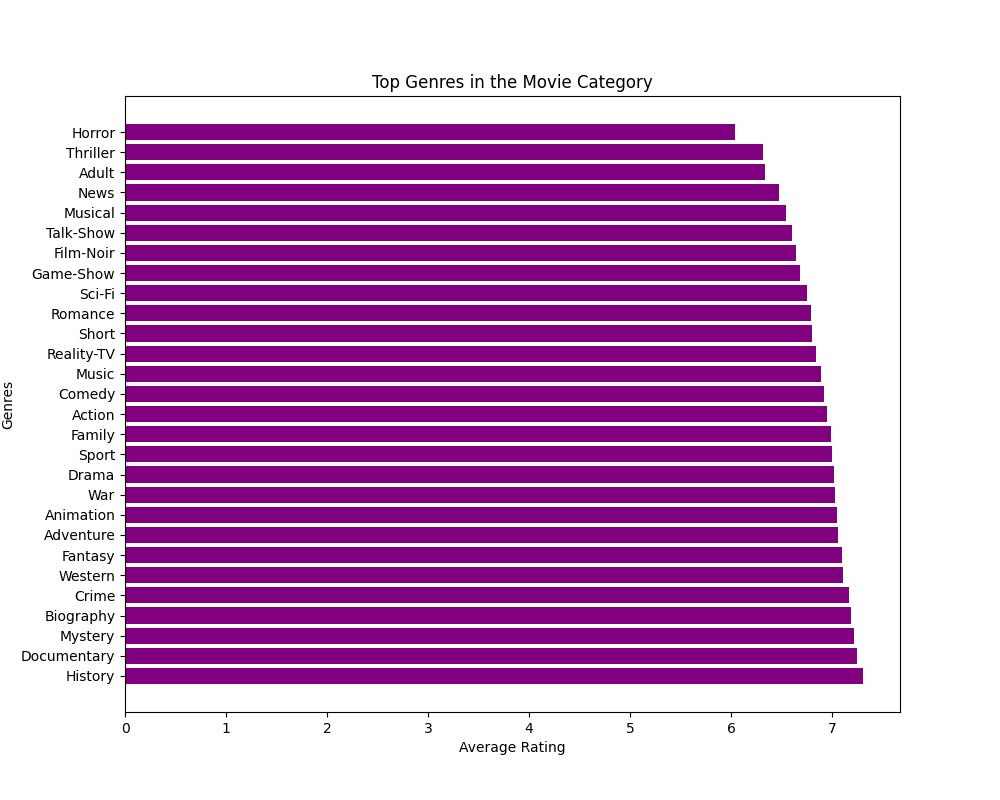

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

average_ratings = join_table.groupBy('genres').agg(F.avg('averageRating').alias('avg_rating')).orderBy('genres')
average_ratings_pd = average_ratings.select('genres', 'avg_rating').toPandas() 

top_genres = average_ratings_pd.sort_values(by='avg_rating', ascending=True)

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_genres['genres'], top_genres['avg_rating'], color='purple')

# Set the chart title and labels
ax.set_title('Top Genres in the Movie Category')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Genres')
ax.invert_yaxis()

%matplot plt


## PART 3 - Analyzing Job Categories

## Total Unique Job Categories

**What is the total number of unique job categories?**

In [30]:
movie_actors.select("tconst", "category").show(5, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|tconst   |category       |
+---------+---------------+
|tt0000001|self           |
|tt0000001|director       |
|tt0000001|cinematographer|
|tt0000002|director       |
|tt0000002|composer       |
+---------+---------------+
only showing top 5 rows

In [31]:
movie_actors.select("category") \
    .distinct() \
    .count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

**What are the unique job categories available?**

In [32]:
movie_actors.select("category") \
    .distinct() \
    .show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|           category|
+-------------------+
|            actress|
|           producer|
|production_designer|
|             writer|
|              actor|
|    cinematographer|
|      archive_sound|
|    archive_footage|
|               self|
|             editor|
|           composer|
|           director|
+-------------------+

## Top Job Categories

Now let's find the top job categories in this dataset by rolling up categories.

### Counts of Titles / Job Category

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [34]:
from pyspark.sql.functions import count

DFmovie_actors = movie_actors.groupby('category').agg(count("category").alias("count"))
DFmovie_actors_pd = DFmovie_actors.toPandas()
DFmovie_actors.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|            actress|6325097|
|           producer|2197866|
|production_designer| 285924|
|             writer|4811596|
|              actor|8493701|
|    cinematographer|1300404|
|      archive_sound|   2143|
|    archive_footage| 209035|
|               self|6153089|
|             editor|1197669|
|           composer|1313187|
|           director|4179106|
+-------------------+-------+

### Bar Chart of Top Job Categories

With this data available, let us now build a barchart of the top 5 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

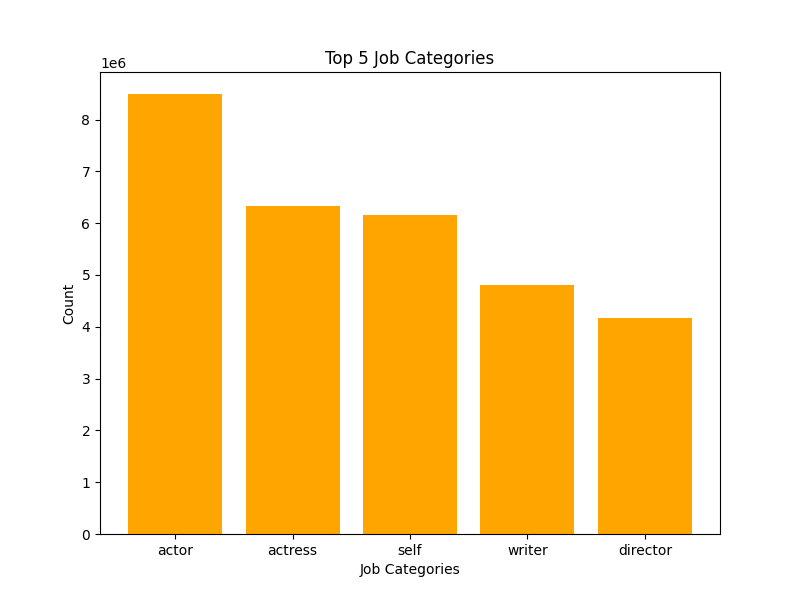

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort DataFrame by 'count' column in descending order
top_categories = DFmovie_actors_pd.sort_values(by='count',
                                               ascending=False).head(5)

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(top_categories['category'], top_categories['count'], color='orange')

# Set chart title and labels
ax.set_title('Top 5 Job Categories')
ax.set_ylabel('Count')
ax.set_xlabel('Job Categories')

# Set y-axis limits
ax.set_ylim([0, None])

%matplot plt

# PART 4 - Answer to the following questions:


## 1) Find all the "movies" featuring "Johnny Depp" and "Helena Bonham Carter".


First join actors, genres, and movie actors on each other

In [36]:
actors.createOrReplaceTempView("Actors")
genres.createOrReplaceTempView("Genres")
movie_actors.createOrReplaceTempView("MovieActors")

join_table2 = spark.sql("""
SELECT g.PrimaryTitle
FROM Genres g JOIN MovieActors m1 ON g.tconst = m1.tconst
JOIN Actors a1 ON m1.nconst = a1.nconst AND a1.PrimaryName = "Johnny Depp"
JOIN MovieActors m2 ON g.tconst = m2.tconst
JOIN Actors a2 ON m2.nconst = a2.nconst AND a2.PrimaryName = "Helena Bonham Carter"
WHERE g.TitleType = 'movie'
""")

join_table2.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|PrimaryTitle                                  |
+----------------------------------------------+
|Corpse Bride                                  |
|Charlie and the Chocolate Factory             |
|Alice in Wonderland                           |
|Alice Through the Looking Glass               |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Dark Shadows                                  |
+----------------------------------------------+

## 2) Find all the "movies" featuring "Brad Pitt" after 2010.. Find all the "movies" featuring "Bratt Pitt" after 2010 

In [37]:
join_table2 = spark.sql("""
SELECT Genres.PrimaryTitle, Genres.StartYear
FROM MovieActors JOIN Genres ON MovieActors.tconst = Genres.tconst
JOIN Actors ON MovieActors.nconst = Actors.nconst
WHERE Actors.PrimaryName = 'Brad Pitt'
AND Genres.TitleType = 'movie'
AND Genres.StartYear > 2010
""")

join_table2.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------+---------+
|PrimaryTitle                     |StartYear|
+---------------------------------+---------+
|By the Sea                       |2015     |
|Irresistible                     |2020     |
|Babylon                          |2021     |
|Voyage of Time: Life's Journey   |2016     |
|Kick-Ass 2                       |2013     |
|Kajillionaire                    |2020     |
|12 Years a Slave                 |2013     |
|The Tree of Life                 |2011     |
|The Big Short                    |2015     |
|The King                         |2019     |
|Fury                             |2014     |
|Vice                             |2018     |
|Moneyball                        |2011     |
|Killing Them Softly              |2012     |
|Allied                           |2016     |
|War Machine                      |2017     |
|Hitting the Apex                 |2015     |
|Ad Astra                         |2019     |
|Once Upon a Time ... in Hollywood

## 3) What is the number of "movies" "acted" by "Zendaya" per year?

In [38]:
join_table2 = spark.sql("""
SELECT Genres.StartYear, COUNT(DISTINCT MovieActors.tconst) AS count
FROM MovieActors JOIN Genres ON MovieActors.tconst = Genres.tconst
JOIN Actors ON MovieActors.nconst = Actors.nconst
WHERE Actors.PrimaryName = 'Zendaya' 
AND Genres.TitleType = 'movie'
AND Genres.StartYear <> '\\N'
GROUP BY Genres.StartYear
ORDER BY Genres.StartYear ASC
""")

join_table2.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|StartYear|count|
+---------+-----+
|     2017|    1|
|     2018|    2|
|     2020|    1|
|       \N|    2|
+---------+-----+

## 4) What are the "movies" by average rating greater than "9.7" and released in "2019"?


In [39]:
ratings.createOrReplaceTempView("Ratings")
genres.createOrReplaceTempView("Genres")

join_table2 = spark.sql("""
SELECT Genres.PrimaryTitle, Ratings.AverageRating
FROM Genres JOIN Ratings ON Genres.tconst = Ratings.tconst
WHERE Genres.StartYear = 2019 
AND Genres.TitleType = 'movie'
AND Ratings.AverageRating > 9.7
GROUP BY Genres.PrimaryTitle, Ratings.AverageRating
ORDER BY Ratings.AverageRating ASC
""")

join_table2.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------+-------------+
|PrimaryTitle                                     |AverageRating|
+-------------------------------------------------+-------------+
|The Twilight Zone: A 60th Anniversary Celebration|10.0         |
|The Butcher Baronet                              |10.0         |
|A Medicine for the Mind                          |10.0         |
|L'Enfant Terrible                                |10.0         |
|A Grunt's Life                                   |10.0         |
|Our Scripted Life                                |10.0         |
|Bu Can Var Oldugu Sürece                         |10.0         |
|Love in Kilnerry                                 |10.0         |
|Kirket                                           |10.0         |
|Square One                                       |9.8          |
|Gini Helida Kathe                                |9.8          |
|Kamen Rider Zi-O: Over Quartzer                  |9.8          |
|We Shall 

## Extra Credit - Analysis of your choice

Try and analyze some interesting dimension to this data. You should specify the question in your Project2_Analysis.ipynb. 

You must join at least two datasets.

## 5) List the name of "Top 5 Highest Rated Actors" who "acted" in the "movie" "Titanic"

In [40]:
join_table2 = spark.sql("""
SELECT Actors.primaryName, Ratings.AverageRating
FROM Actors JOIN MovieActors ON Actors.nconst = MovieActors.nconst
JOIN Genres ON MovieActors.tconst = Genres.tconst
JOIN Ratings ON Genres.tconst = Ratings.tconst
WHERE Genres.primaryTitle = 'Titanic' 
AND Genres.TitleType = 'movie'
AND MovieActors.category = 'actor'
ORDER BY Ratings.AverageRating DESC LIMIT 5
""")

join_table2.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-------------+
|primaryName      |AverageRating|
+-----------------+-------------+
|Leonardo DiCaprio|7.8          |
|Billy Zane       |7.8          |
|Robert Wagner    |7.0          |
|Clifton Webb     |7.0          |
|Luigi Duse       |6.8          |
+-----------------+-------------+